In [13]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
#import statsmodels.formula.api as sm
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
os.chdir("C:\\Users\\pravesh.tiwari\\Documents\\Python\\Statistical Modeling")
data = pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [17]:
data = pd.get_dummies(data, columns=['sales', 'salary'])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [18]:
y=data['left']
print(y.unique())
X=data.drop(['left'],axis=1)
X.head()

[1 0]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [41]:
logreg = LogisticRegression()
rfe = RFE(logreg, )
rfe = rfe.fit(X_train, y_train.values.ravel())
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('satisfaction_level', True, 1),
 ('last_evaluation', True, 1),
 ('number_project', False, 3),
 ('average_montly_hours', False, 11),
 ('time_spend_company', True, 1),
 ('Work_accident', True, 1),
 ('promotion_last_5years', True, 1),
 ('sales_IT', False, 4),
 ('sales_RandD', True, 1),
 ('sales_accounting', False, 5),
 ('sales_hr', True, 1),
 ('sales_management', True, 1),
 ('sales_marketing', False, 6),
 ('sales_product_mng', False, 10),
 ('sales_sales', False, 9),
 ('sales_support', False, 8),
 ('sales_technical', False, 7),
 ('salary_high', True, 1),
 ('salary_low', True, 1),
 ('salary_medium', False, 2)]

In [42]:
print(X_train.columns[rfe.support_])
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe = sm.add_constant(X_train_rfe)

Index(['satisfaction_level', 'last_evaluation', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'sales_RandD', 'sales_hr',
       'sales_management', 'salary_high', 'salary_low'],
      dtype='object')


C:\Users\pravesh.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
model = sm.Logit(y_train, X_train_rfe)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.433175
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10488
Method:                           MLE   Df Model:                           10
Date:                Sat, 04 Jan 2020   Pseudo R-squ.:                  0.2094
Time:                        06:15:08   Log-Likelihood:                -4547.9
converged:                       True   LL-Null:                       -5752.4
                                        LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1065      0.133     -0.803      0.422      -0.367       0.154
satisfaction_level       -3.8201      0.109    -35.075      0.000      -4.034      -3.607
last_evaluation           0.3155      0.152      2.075      0.038       0.018       0.614
time_spend_company        0.2243      0.018     12.570      0.000       0.189       0.259
Work_accident            -1.4759      0.105    -14.080      0.000      -1.681      -1.270
promotion_last_5years    -1.3724      0.312     -4.400      0.000      -1.984      -0.761
sales_RandD              -0.5235      0.132     -3.963      0.000      -0.782      -0.265
sales_hr                  0.3126      0.112      2.800      0.005       0.094       0.531
sales_management         -0.3157      0.155     -2.042      0.041      -0.619      -0.013
salary_high              -1.4332      0.157     -9.140      0.000      -1.741      -1.126
salary_low                0.5429      0.054      9.987      0.000       0.436       0.649
=========================================================================================
"""

In [44]:
X_train_rfe = X_train_rfe.drop(["salary_high", "salary_low"], axis = 1)
model = sm.Logit(y_train, X_train_rfe)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.446647
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10490
Method:                           MLE   Df Model:                            8
Date:                Sat, 04 Jan 2020   Pseudo R-squ.:                  0.1848
Time:                        06:15:09   Log-Likelihood:                -4689.3
converged:                       True   LL-Null:                       -5752.4
                                        LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1745      0.127      1.373      0.170      -0.075       0.424
satisfaction_level       -3.8143      0.107    -35.603      0.000      -4.024      -3.604
last_evaluation           0.3651      0.150      2.435      0.015       0.071       0.659
time_spend_company        0.2000      0.017     11.549      0.000       0.166       0.234
Work_accident            -1.4425      0.104    -13.921      0.000      -1.646      -1.239
promotion_last_5years    -1.5569      0.309     -5.047      0.000      -2.162      -0.952
sales_RandD              -0.5381      0.131     -4.112      0.000      -0.795      -0.282
sales_hr                  0.2948      0.110      2.673      0.008       0.079       0.511
sales_management         -0.6893      0.150     -4.598      0.000      -0.983      -0.395
=========================================================================================
"""

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train_rfe, y_train)
X_test = sm.add_constant(X_test)
X_test_rfe = X_test.filter(list(X_train_rfe.columns))
y_pred = logreg.predict(X_test_rfe)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_rfe, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


C:\Users\pravesh.tiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3170  250]
 [ 830  250]]


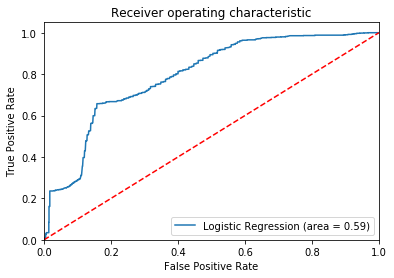

In [39]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_rfe))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_rfe)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
# for interpretation of coefficients refer
https://rpubs.com/OmaymaS/182726